<a href="https://colab.research.google.com/github/HyunMiPark/study_AI/blob/main/%5B1%EC%A3%BC%EC%B0%A8%5D_%EC%8B%AC%ED%99%94%EA%B3%BC%EC%A0%9C_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1) # 가장 높은 확률을 가진 클래스 선택

    cnt += labels.shape[0] # 전체 샘플 개수
    acc += (labels == preds).sum().item() # 맞춘 개수

  return acc / cnt


def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

In [3]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 170M/170M [00:03<00:00, 48.6MB/s]


In [5]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [6]:
from torch import nn

#LeakyReLU
#ReLU는 음수 값을 0으로 만드는데, LeakyReLU는 작은 값(예: 0.01)을 유지
#기울기 소실 문제(Vanishing Gradient)를 완화하는 효과.
class Model1(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

In [7]:
#SGD(확률적 경사 하강법)
#단순한 기울기 기반 업데이트 → 수렴 속도가 느릴 수 있음)
from torch.optim import SGD, Adam

lr = 0.001

model = Model1(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

n_epochs = 50
loss_fn = nn.CrossEntropyLoss()

train_sgd = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_sgd.append(accuracy(model, trainloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 450.69850492477417
Epoch   2 | Loss: 449.10055661201477
Epoch   3 | Loss: 447.6373932361603
Epoch   4 | Loss: 446.2801585197449
Epoch   5 | Loss: 444.965274810791
Epoch   6 | Loss: 443.6175546646118
Epoch   7 | Loss: 442.24930214881897
Epoch   8 | Loss: 440.83924412727356
Epoch   9 | Loss: 439.37473702430725
Epoch  10 | Loss: 437.85384464263916
Epoch  11 | Loss: 436.2655107975006
Epoch  12 | Loss: 434.6086983680725
Epoch  13 | Loss: 432.9188423156738
Epoch  14 | Loss: 430.7980806827545
Epoch  15 | Loss: 428.6108651161194
Epoch  16 | Loss: 426.44970631599426
Epoch  17 | Loss: 424.3272776603699
Epoch  18 | Loss: 422.2454273700714
Epoch  19 | Loss: 420.235422372818
Epoch  20 | Loss: 418.32019305229187
Epoch  21 | Loss: 416.4510567188263
Epoch  22 | Loss: 414.55280900001526
Epoch  23 | Loss: 410.9568769931793
Epoch  24 | Loss: 407.99229860305786
Epoch  25 | Loss: 405.407218337059
Epoch  26 | Loss: 403.01640224456787
Epoch  27 | Loss: 400.7162185907364
Epoch  28 | Loss: 39

In [8]:
from torch.optim import Adam

#ADAM
#학습률을 자동 조정해 빠르게 수렴 가능.
model = Model1(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_adam = []
test_adam = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward() #기울기 계산
    optimizer.step() #가중치 업데이트

    total_loss += loss.item()

  train_adam.append(accuracy(model, trainloader))
  test_adam.append(accuracy(model, testloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 425.25245809555054
Epoch   2 | Loss: 386.494908452034
Epoch   3 | Loss: 366.42044484615326
Epoch   4 | Loss: 350.2779269218445
Epoch   5 | Loss: 338.6478890180588
Epoch   6 | Loss: 329.59170615673065
Epoch   7 | Loss: 321.67439210414886
Epoch   8 | Loss: 315.0121046304703
Epoch   9 | Loss: 307.4143787622452
Epoch  10 | Loss: 302.2416242361069
Epoch  11 | Loss: 297.96825408935547
Epoch  12 | Loss: 291.3555769920349
Epoch  13 | Loss: 286.4927085638046
Epoch  14 | Loss: 281.9953601360321
Epoch  15 | Loss: 278.0069354772568
Epoch  16 | Loss: 273.9178502559662
Epoch  17 | Loss: 273.8503848314285
Epoch  18 | Loss: 268.36947798728943
Epoch  19 | Loss: 265.0483636856079
Epoch  20 | Loss: 261.10164630413055
Epoch  21 | Loss: 259.3191840648651
Epoch  22 | Loss: 254.22306978702545
Epoch  23 | Loss: 252.26714384555817
Epoch  24 | Loss: 248.36389315128326
Epoch  25 | Loss: 245.23775792121887
Epoch  26 | Loss: 243.3068540096283
Epoch  27 | Loss: 240.91635239124298
Epoch  28 | Loss:

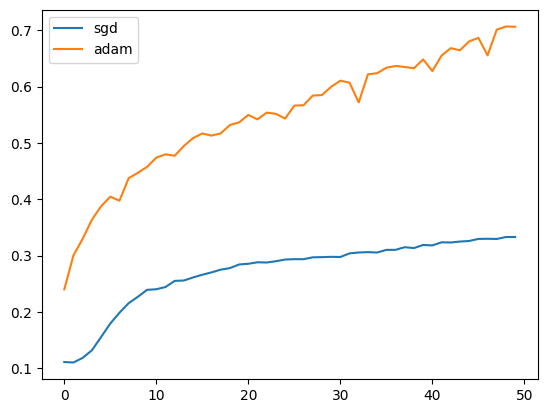

In [9]:
#SGD / ADAM 수치 비교
plot_acc(train_sgd, train_adam, 'sgd', 'adam')

In [10]:
#Sigmoid
#출력값을 0~1로 제한 → 다층 신경망에서는 기울기 소실 문제 발생 가능.
#ReLU 대비 학습 속도가 느리고 성능이 낮을 수 있음.
class Model2(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.Sigmoid()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

In [11]:
model = Model2(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_sigmoid = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_sigmoid.append(accuracy(model, trainloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 411.70917558670044
Epoch   2 | Loss: 393.6114270687103
Epoch   3 | Loss: 387.2062293291092
Epoch   4 | Loss: 383.44589269161224
Epoch   5 | Loss: 381.25119864940643
Epoch   6 | Loss: 379.3618904352188
Epoch   7 | Loss: 377.47508585453033
Epoch   8 | Loss: 375.85673117637634
Epoch   9 | Loss: 374.5112977027893
Epoch  10 | Loss: 373.23339807987213
Epoch  11 | Loss: 371.7294100522995
Epoch  12 | Loss: 371.0403389930725
Epoch  13 | Loss: 369.5190552473068
Epoch  14 | Loss: 369.2120305299759
Epoch  15 | Loss: 369.47765505313873
Epoch  16 | Loss: 367.70269298553467
Epoch  17 | Loss: 366.5006343126297
Epoch  18 | Loss: 365.9392955303192
Epoch  19 | Loss: 364.8944082260132
Epoch  20 | Loss: 364.21512711048126
Epoch  21 | Loss: 363.5801748037338
Epoch  22 | Loss: 363.0997051000595
Epoch  23 | Loss: 362.32763850688934
Epoch  24 | Loss: 362.1175527572632
Epoch  25 | Loss: 361.3080734014511
Epoch  26 | Loss: 360.5033013820648
Epoch  27 | Loss: 359.93302154541016
Epoch  28 | Loss:

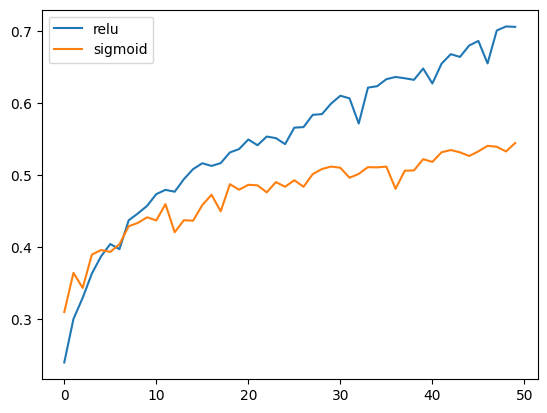

In [12]:
plot_acc(train_adam, train_sigmoid, 'relu', 'sigmoid')

In [13]:
#Dropout(p=0.1)
#학습 중 랜덤하게 10%의 뉴런을 비활성화 → 과적합 방지 효과.
class Model3(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()
    self.dropout = nn.Dropout(p=0.1)

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.dropout(self.act(self.layer1(x)))
    x = self.dropout(self.act(self.layer2(x)))
    x = self.dropout(self.act(self.layer3(x)))

    return x

In [14]:
model = Model3(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_dropout = []
test_dropout = []

for epoch in range(n_epochs):
  total_loss = 0.
  model.train() #drop 활성화, 학습 중 일부 뉴런 비활성화
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  with torch.no_grad():
    model.eval() #drop 비활성화, 모든 뉴런 활성화, 평가 시 사용
    train_dropout.append(accuracy(model, trainloader))
    test_dropout.append(accuracy(model, testloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 445.46045780181885
Epoch   2 | Loss: 420.85346150398254
Epoch   3 | Loss: 409.55874705314636
Epoch   4 | Loss: 408.2497087717056
Epoch   5 | Loss: 396.09265971183777
Epoch   6 | Loss: 388.42588245868683
Epoch   7 | Loss: 385.3480041027069
Epoch   8 | Loss: 380.1010752916336
Epoch   9 | Loss: 377.6019207239151
Epoch  10 | Loss: 375.1511970758438
Epoch  11 | Loss: 370.6235078573227
Epoch  12 | Loss: 366.891614317894
Epoch  13 | Loss: 363.63717567920685
Epoch  14 | Loss: 361.31112909317017
Epoch  15 | Loss: 359.0815930366516
Epoch  16 | Loss: 355.9613742828369
Epoch  17 | Loss: 353.6727296113968
Epoch  18 | Loss: 350.5377006530762
Epoch  19 | Loss: 350.194380402565
Epoch  20 | Loss: 347.23401415348053
Epoch  21 | Loss: 345.74218785762787
Epoch  22 | Loss: 342.98069977760315
Epoch  23 | Loss: 341.55367970466614
Epoch  24 | Loss: 339.2498848438263
Epoch  25 | Loss: 337.1488537788391
Epoch  26 | Loss: 335.86411023139954
Epoch  27 | Loss: 333.41692078113556
Epoch  28 | Loss:

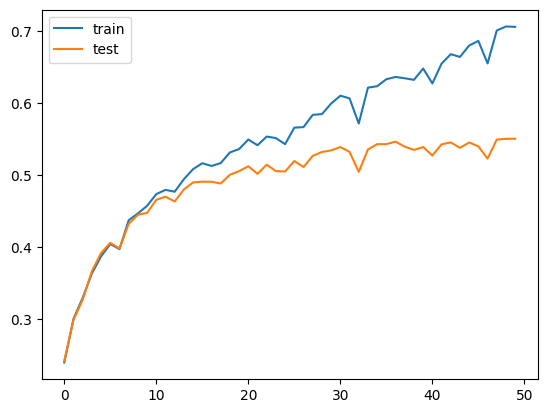

In [15]:
plot_acc(train_adam, test_adam)

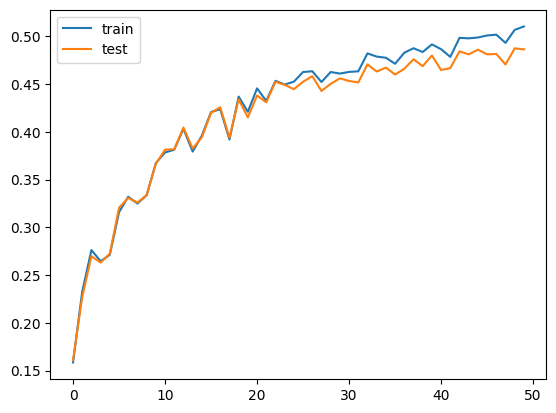

In [16]:
plot_acc(train_dropout, test_dropout)

#정리
#SGD vs Adam: Adam이 빠르게 수렴하고 손실이 적음.
#ReLU vs Sigmoid: ReLU가 성능이 더 좋음 (Sigmoid는 기울기 소실 문제 발생).
#Dropout 적용 여부: Dropout을 사용하면 테스트 정확도가 더 높아짐 (과적합 방지).